# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


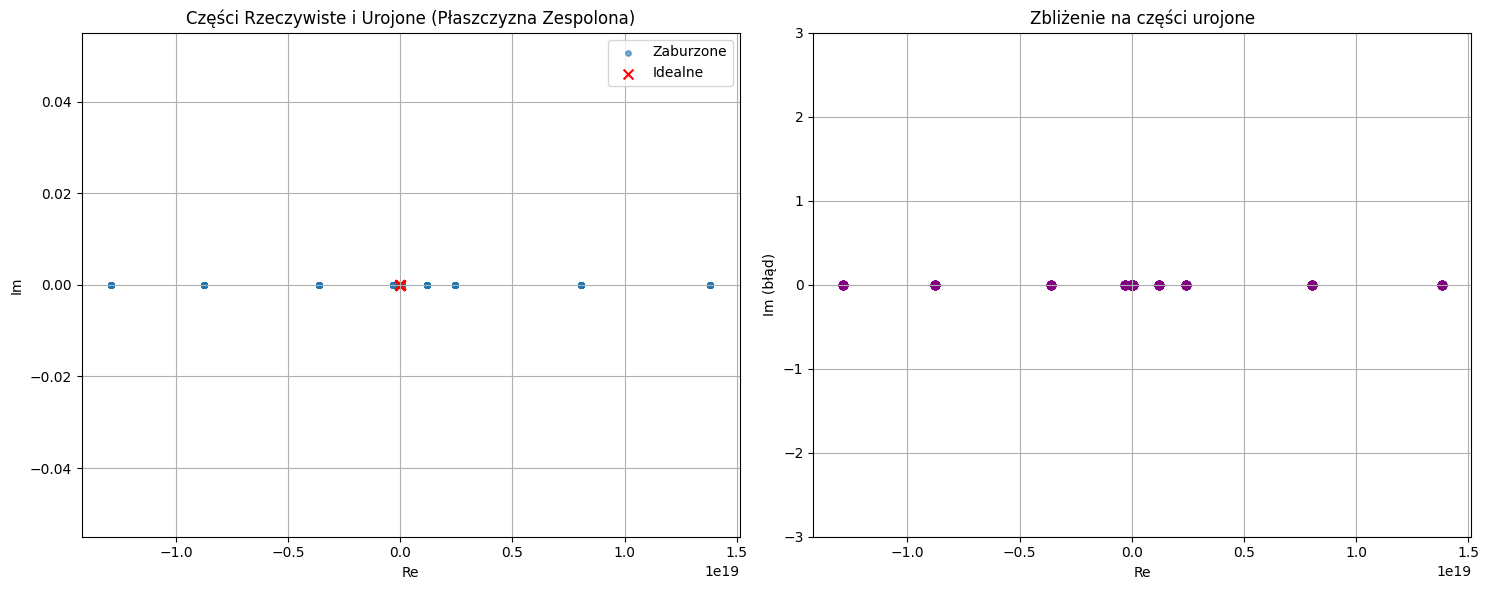

In [14]:
# ===== Twoja implementacja tutaj =====
import main

pierw = []
for i in range(1, 21):
    pierw.append(i)


a2 = nppoly.polyfromroots(pierw)
a2 = np.array(a2)



iterations = 20
perturbation_scale = 1e-10 

all_roots_real = []
all_roots_imag = []


current_coeffs = a2.copy()

for k in range(iterations):
    wynik_funkcji = main.roots_20(current_coeffs)
    roots = np.array(roots) 
 

    all_roots_real.extend(np.real(roots))
    all_roots_imag.extend(np.imag(roots))

    noise = current_coeffs * np.random.uniform(-1, 1, size=current_coeffs.shape) * perturbation_scale
    current_coeffs = current_coeffs + noise


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.scatter(all_roots_real, all_roots_imag, alpha=0.6, s=15, label='Zaburzone')
ax1.scatter(pierw, np.zeros_like(pierw), color='red', marker='x', s=50, label='Idealne')
ax1.set_title("Części Rzeczywiste i Urojone (Płaszczyzna Zespolona)")
ax1.set_xlabel("Re")
ax1.set_ylabel("Im")
ax1.grid(True)
ax1.legend()

ax2.scatter(all_roots_real, all_roots_imag, c='purple', alpha=0.5)
ax2.set_title("Zbliżenie na części urojone")
ax2.set_xlabel("Re")
ax2.set_ylabel("Im (błąd)")
ax2.set_ylim(-3, 3) 
ax2.grid(True)

plt.tight_layout()
plt.show()



---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Wartości własne (np.eigvals):
[1.019 +0.008j  1.019 -0.008j  1.0077+0.019j  1.0077-0.019j
 0.992 +0.0188j 0.992 -0.0188j 0.9812+0.0077j 0.9812-0.0077j]

Wartości z diagonali Schura (complex):
[1.019 +0.008j  1.0076+0.019j  0.992 +0.0187j 1.019 -0.0079j
 0.9813+0.0076j 0.9813-0.0077j 1.0077-0.019j  0.9921-0.0187j]

 pierwiastki z polyroots
[0.9779-0.009j  0.9779+0.009j  0.9905-0.0221j 0.9905+0.0221j
 1.009 -0.0226j 1.009 +0.0226j 1.0226-0.0095j 1.0226+0.0095j]


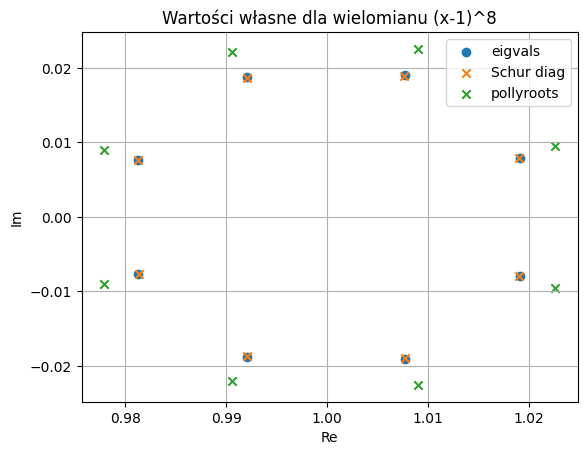

In [3]:
# ===== Twoja implementacja tutaj =====
w3 = nppoly.polyfromroots([1]*8) 


F3 = main.frob_a(w3) 

ww = np.linalg.eigvals(F3)

T, Z = sp.linalg.schur(F3, output='complex')
ww_s = np.diag(T)

pierw = nppoly.polyroots(w3)

print("Wartości własne (np.eigvals):")
print(np.round(ww, 4))
print("\nWartości z diagonali Schura (complex):")
print(np.round(ww_s, 4))
print("\n pierwiastki z polyroots")
print(np.round(pierw, 4))

plt.scatter(ww.real, ww.imag, label='eigvals')
plt.scatter(ww_s.real, ww_s.imag, marker='x', label='Schur diag')
plt.scatter(pierw.real, pierw.imag, marker='x', label='pollyroots')
plt.title('Wartości własne dla wielomianu (x-1)^8')
plt.xlabel('Re')
plt.ylabel('Im')
plt.legend()
plt.grid(True)




---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

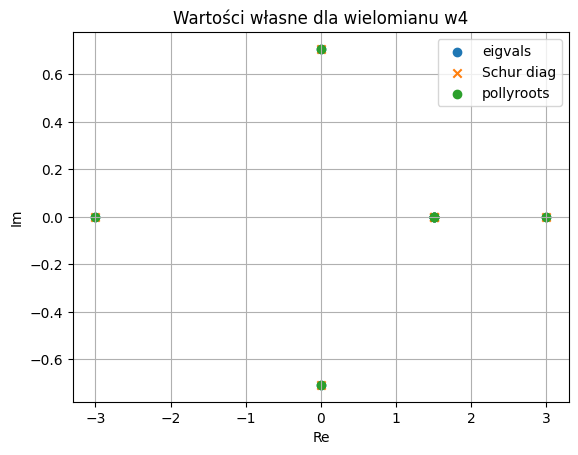

In [4]:
# ===== Twoja implementacja tutaj =====
w4 = np.array([243,-486,783,-990,558,-28,-72,16])

F4 = main.frob_a(w4) 
ww = np.linalg.eigvals(F4)

T, Z = sp.linalg.schur(F4, output='complex')
ww_s = np.diag(T)

pierw2 = nppoly.polyroots(w4)

plt.scatter(ww.real, ww.imag, label='eigvals')
plt.scatter(ww_s.real, ww_s.imag, marker='x', label='Schur diag')
plt.scatter(pierw2.real, pierw2.imag, marker='o', label='pollyroots')
plt.title('Wartości własne dla wielomianu w4')
plt.xlabel('Re')
plt.ylabel('Im')
plt.legend()
plt.grid(True)



---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [7]:
# ===== Twoja implementacja tutaj =====
Ns = [10, 20, 30]
    
print(f"{'N':<5} | {'Metoda':<15} | {'Max Błąd (|x - x_ref|)':<25} | {'Uwagi'}")
print("-" * 80)

for n in Ns:
        eig_analytical = 2.0 ** np.arange(1, n + 1)
  
        A_n = np.diag(eig_analytical)

        eig_A = np.linalg.eigvals(A_n)
        err_A = np.max(np.abs(np.sort(eig_A) - np.sort(eig_analytical)))
        print(f"{n:<5} | {'A (diag)':<15} | {err_A:<25.2e} | Bazowa")

        while True:
            P_n = np.random.randint(0, 100, (n, n)).astype(float)
            if main.is_nonsingular(P_n):
                break
        

        P_inv = np.linalg.inv(P_n)
        B_n = P_n @ A_n @ P_inv
        
        eig_B = np.linalg.eigvals(B_n)
        err_B = np.max(np.abs(np.sort(eig_B) - np.sort(eig_analytical)))
        

        cond_P = np.linalg.cond(P_n)
        print(f"{n:<5} | {'B (losowa P)':<15} | {err_B:<25.2e} | cond(P)={cond_P:.1e}")


        Q_n, _ = np.linalg.qr(P_n)
        

        C_n = Q_n @ A_n @ Q_n.T
        
        eig_C = np.linalg.eigvals(C_n)
        err_C = np.max(np.abs(np.sort(eig_C) - np.sort(eig_analytical)))
        print(f"{n:<5} | {'C (orto Q)':<15} | {err_C:<25.2e} | Stabilna")


        coeffs = nppoly.polyfromroots(eig_analytical)

        F_n = main.frob_a(coeffs)
        

        if F_n is not None:
            try:
                eig_F = np.linalg.eigvals(F_n)
                eig_F_sorted = np.sort(eig_F.real) 
                eig_analytical_sorted = np.sort(eig_analytical)
                err_F = np.max(np.abs(eig_F_sorted - eig_analytical_sorted))
                print(f"{n:<5} | {'F (Frob)':<15} | {err_F:<25.2e} | Bardzo niestabilna")
            except Exception as e:
                 print(f"{n:<5} | {'F (Frob)':<15} | {'BŁĄD':<25} | {e}")
        else:
             print(f"{n:<5} | {'F (Frob)':<15} | {'None':<25} | Błąd konstrukcji")
             
        print("-" * 80)

N     | Metoda          | Max Błąd (|x - x_ref|)    | Uwagi
--------------------------------------------------------------------------------
10    | A (diag)        | 0.00e+00                  | Bazowa
10    | B (losowa P)    | 1.25e-12                  | cond(P)=7.9e+01
10    | C (orto Q)      | 9.09e-13                  | Stabilna
10    | F (Frob)        | 1.82e-12                  | Bardzo niestabilna
--------------------------------------------------------------------------------
20    | A (diag)        | 0.00e+00                  | Bazowa
20    | B (losowa P)    | 1.11e-09                  | cond(P)=1.2e+02
20    | C (orto Q)      | 9.31e-10                  | Stabilna
20    | F (Frob)        | 2.24e-09                  | Bardzo niestabilna
--------------------------------------------------------------------------------
30    | A (diag)        | 0.00e+00                  | Bazowa
30    | B (losowa P)    | 2.19e-04                  | cond(P)=4.4e+03
30    | C (orto Q)      | 1.43e-

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)